In [1]:
import pandas as pd

In [129]:
df = pd.read_csv('CER_line_1139_clean.csv', header=0, index_col=0)
df = df.rename(columns={'Days.1':'Day', 'Days':'Sequence'})

df2 = pd.read_csv('CER.csv')
df['Date'] = df2['Timepoint']


df3=pd.DataFrame((x.split(' ') for x in df['Date']),index=df.index,columns=['Date','hours'])

df=pd.merge(df,df3,right_index=True, left_index=True)

df = df.rename(columns={'Date_x':'Datetime', 'Date_y':'Date'})

df = df.set_index('Datetime')

df = df.set_index(pd.DatetimeIndex(pd.to_datetime(df.index)))
df

,Line,Power,Sequence,holidays,Hour,Day,Month,Temperature,humiduity,Wind_speed,Date,hours
Datetime,,,,,,,,,,,,
2009-07-14 00:00:00,1139,0.089,1,0,0.0,14,7,11.80,93.0,14.4,2009-07-14,00:00:00
2009-07-14 00:30:00,1139,0.067,2,0,0.5,14,7,11.80,91.0,14.4,2009-07-14,00:30:00
2009-07-14 01:00:00,1139,0.214,3,0,1.0,14,7,11.80,89.0,18.0,2009-07-14,01:00:00
2009-07-14 01:30:00,1139,0.121,4,0,1.5,14,7,11.60,91.0,18.0,2009-07-14,01:30:00
2009-07-14 02:00:00,1139,0.066,5,0,2.0,14,7,11.40,93.0,10.8,2009-07-14,02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 21:30:00,1139,0.929,44,1,21.5,31,12,5.55,87.5,7.2,2010-12-31,21:30:00
2010-12-31 22:00:00,1139,1.022,45,1,22.0,31,12,5.60,86.0,10.8,2010-12-31,22:00:00
2010-12-31 22:30:00,1139,0.895,46,1,22.5,31,12,5.60,85.0,10.8,2010-12-31,22:30:00


In [128]:
daily_groups = df.resample('D')
daily_data = daily_groups.sum()
print(daily_data[-12:-5])
daily_data['holidays'] = daily_data['holidays'].map(lambda x: x/48)
daily_data['Temperature'] = daily_data['Temperature'].map(lambda x: x/48)
daily_data['humiduity'] = daily_data['humiduity'].map(lambda x: x/48)
daily_data['Wind_speed'] = daily_data['Wind_speed'].map(lambda x: x/48)


daily_data = daily_data.assign(**df.index.to_frame())
daily_data['Datetime'] = daily_data['Datetime'].apply(lambda x:x.strftime('%Y-%m-%d'))



df3 = pd.DataFrame((x.split('-') for x in daily_data['Datetime']),index=daily_data.index,columns=['Year', 'Month', 'Day'])

daily_data['Month'] = df3['Month']
daily_data['Day'] = df3['Day']

daily_data = daily_data.loc[:, ['Power', 'holidays', 'Temperature', 'humiduity', 'Wind_speed', 'Month', 'Day']]
daily_data[['Month', 'Day']] = daily_data[['Month', 'Day']].astype('int32')

print(daily_data.info())
print(daily_data)


daily_data.to_csv('1139_daily.csv')

             Line   Power  Sequence  holidays   Hour   Day  Month  \
Datetime                                                            
2010-12-20  54672  47.160      1176         0  564.0   960    576   
2010-12-21  54672  51.797      1176        48  564.0  1008    576   
2010-12-22  54672  60.987      1176         0  564.0  1056    576   
2010-12-23  54672  47.409      1176         0  564.0  1104    576   
2010-12-24  54672  66.597      1176        48  564.0  1152    576   
2010-12-25  54672  69.428      1176        48  564.0  1200    576   
2010-12-26  54672  41.783      1176        48  564.0  1248    576   

            Temperature  humiduity  Wind_speed  
Datetime                                        
2010-12-20      -198.10     4667.5       511.2  
2010-12-21      -214.05     4712.5       720.0  
2010-12-22      -232.25     4714.0       604.8  
2010-12-23      -122.95     4691.0       669.6  
2010-12-24      -368.70     4757.0       900.0  
2010-12-25      -372.85     4584.0 

<AxesSubplot:>

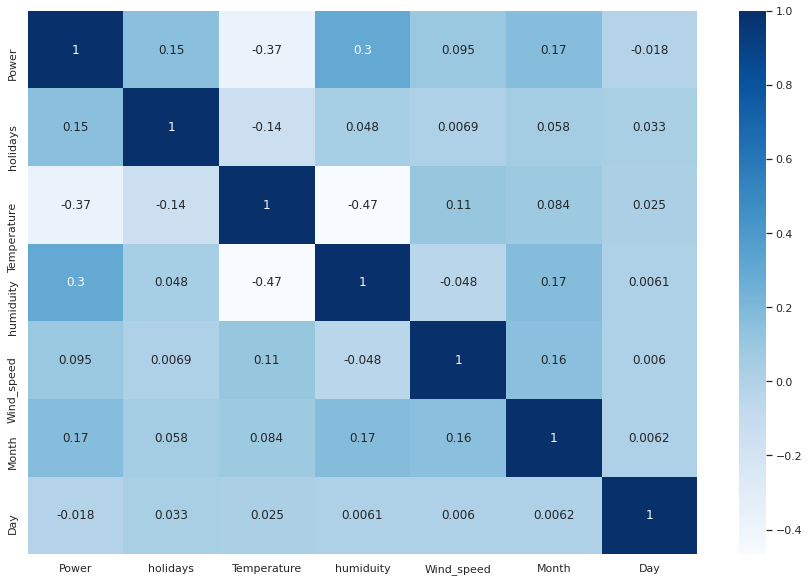

In [84]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

corr = daily_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='Blues',annot=True)

<AxesSubplot:xlabel='Power', ylabel='Density'>

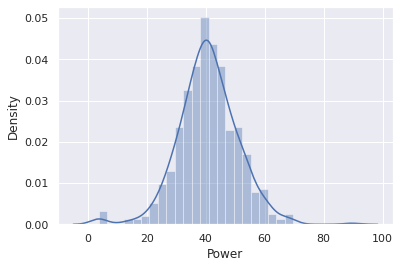

In [154]:
import seaborn as sns
sns.distplot(dataset['Power'])

In [1]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores


In [2]:
dataset = read_csv('1139_daily.csv', header=0, infer_datetime_format=True, parse_dates=['Datetime'], index_col=['Datetime'])
dataset[5:-13]

NameError: name 'read_csv' is not defined

In [3]:
# split into standard weeks
from numpy import split
from numpy import array
from pandas import read_csv
 
# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[6:-12], data[-12:-5]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test
 
# load the new file
dataset = read_csv('1139_daily.csv', header=0, infer_datetime_format=True, parse_dates=['Datetime'], index_col=['Datetime'])
train, test = split_dataset(dataset.values)
# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])
# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])



(74, 7, 7)
38.294 54.856
(1, 7, 7)
47.16 41.783


In [4]:
# evaluate a single model
def evaluate_model(train, test, n_input):
    # fit model
    model = build_model(train, n_input)
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = forecast(model, history, n_input)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    # evaluate predictions days for each week
    predictions = array(predictions)
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores

In [5]:
# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))


In [6]:
import numpy as np

def mape(y_true, y_pred):
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

Epoch 1/50
28/28 - 2s - loss: 17.5602 - mape: 54.2053 - val_loss: 9.8721 - val_mape: 23.1635
Epoch 2/50
28/28 - 0s - loss: 7.5748 - mape: 29.6523 - val_loss: 9.1996 - val_mape: 20.6417
Epoch 3/50
28/28 - 0s - loss: 7.2419 - mape: 28.7505 - val_loss: 7.8141 - val_mape: 19.2883
Epoch 4/50
28/28 - 0s - loss: 6.8971 - mape: 28.4547 - val_loss: 8.1663 - val_mape: 19.4139
Epoch 5/50
28/28 - 1s - loss: 6.7478 - mape: 27.7175 - val_loss: 7.7998 - val_mape: 19.0561
Epoch 6/50
28/28 - 0s - loss: 6.7176 - mape: 27.5941 - val_loss: 7.9899 - val_mape: 20.8784
Epoch 7/50
28/28 - 0s - loss: 6.8371 - mape: 27.9059 - val_loss: 8.0094 - val_mape: 19.1162
Epoch 8/50
28/28 - 0s - loss: 6.6657 - mape: 27.3156 - val_loss: 8.1680 - val_mape: 21.8589
Epoch 9/50
28/28 - 0s - loss: 6.5960 - mape: 27.0923 - val_loss: 8.3902 - val_mape: 19.7343
Epoch 10/50
28/28 - 0s - loss: 6.6530 - mape: 27.2093 - val_loss: 7.8675 - val_mape: 19.6376
Epoch 11/50
28/28 - 1s - loss: 6.5437 - mape: 26.8796 - val_loss: 8.2165 - val

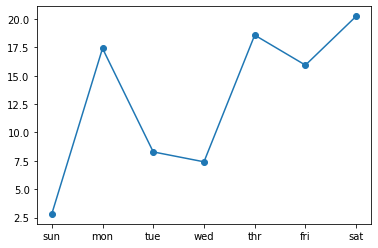

In [19]:
# multivariate multi-step encoder-decoder lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
 
# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[5:-13], data[-13:-6]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test
 
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		MAPE = mape(actual[:, i], predicted[:, i])
		# calculate rmse
		#rmse = sqrt(mse)
		# store
		scores.append(MAPE)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores
 
# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))
 
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			X.append(data[in_start:in_end, :])
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)
 
# train the model
def build_model(train, n_input):
    # prepare data
    train_x, train_y = to_supervised(train, n_input)
    # define parameters
    verbose, epochs, batch_size = 2, 50, 16
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    # reshape output into [samples, timesteps, features]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
    # define model
    model = Sequential()
    model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(RepeatVector(n_outputs))
    model.add(LSTM(200, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(100, activation='relu')))
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss='mae', metrics=['mape'], optimizer='adam')
    # fit network
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=verbose)
    return model
 
# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, :]
	# reshape into [1, n_input, n]
	input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat
 
# evaluate a single model
def evaluate_model(train, test, n_input):
	# fit model
	model = build_model(train, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores
 
# load the new file
dataset = read_csv('1139_daily.csv', header=0, infer_datetime_format=True, parse_dates=['Datetime'], index_col=['Datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# evaluate model and get scores
n_input = 14
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()


In [18]:
# daily load forecasting
from sklearn.preprocessing import MinMaxScaler

#define the shift function
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


# load dataset
dataset = pd.read_csv('1139_daily.csv', header=0, index_col=0)
dataset = dataset.loc[:, ['Power', 'holidays','Day', 'Month', 'Temperature', 'humiduity', 'Wind_speed']]
#dataset['Power'] = dataset['Power'].apply(lambda x: x*100)
print(dataset.head())
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
#scaler = StandardScaler()
scaled = scaler.fit_transform(values)
print(scaled)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8, 9, 10, 11, 12, 13]], axis=1, inplace=True)
print(reframed.head())
print(reframed.info())


NameError: name 'pd' is not defined

(500, 1, 7) (500,) (35, 1, 7) (35,)
Epoch 1/30
25/25 - 2s - loss: 0.3755 - mse: 0.1555 - val_loss: 0.3123 - val_mse: 0.1069
Epoch 2/30
25/25 - 0s - loss: 0.2171 - mse: 0.0626 - val_loss: 0.1028 - val_mse: 0.0168
Epoch 3/30
25/25 - 0s - loss: 0.0911 - mse: 0.0142 - val_loss: 0.0882 - val_mse: 0.0140
Epoch 4/30
25/25 - 0s - loss: 0.0994 - mse: 0.0171 - val_loss: 0.0821 - val_mse: 0.0137
Epoch 5/30
25/25 - 0s - loss: 0.0903 - mse: 0.0142 - val_loss: 0.0821 - val_mse: 0.0137
Epoch 6/30
25/25 - 0s - loss: 0.0925 - mse: 0.0149 - val_loss: 0.0818 - val_mse: 0.0137
Epoch 7/30
25/25 - 0s - loss: 0.0909 - mse: 0.0144 - val_loss: 0.0819 - val_mse: 0.0136
Epoch 8/30
25/25 - 0s - loss: 0.0915 - mse: 0.0146 - val_loss: 0.0817 - val_mse: 0.0136
Epoch 9/30
25/25 - 0s - loss: 0.0911 - mse: 0.0144 - val_loss: 0.0816 - val_mse: 0.0136
Epoch 10/30
25/25 - 0s - loss: 0.0906 - mse: 0.0143 - val_loss: 0.0815 - val_mse: 0.0136
Epoch 11/30
25/25 - 0s - loss: 0.0907 - mse: 0.0143 - val_loss: 0.0813 - val_mse: 0

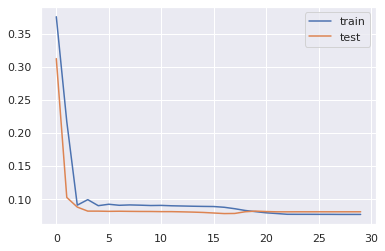

Test RMSE: 13.836
10.6267805
0.26316237


In [206]:
from keras import layers
from math import sqrt
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


values = reframed.values
n_train_days = 500 
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# dataset split
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input for RNN [samples, time_step, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


# design network
model = Sequential()
model.add(keras.layers.InputLayer(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Conv1D(filters = 32, kernel_size = 2, padding ='same', 
                            activation='relu', kernel_initializer ="glorot_uniform"))
model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
model.add(layers.Conv1D(filters = 16, kernel_size = 2, padding ='same', 
                            activation='relu', kernel_initializer="glorot_uniform"))
model.add(layers.MaxPooling1D(pool_size=2, padding='same'))
model.add(layers.LSTM(50, return_sequences=True, activation="relu"))
model.add(layers.LSTM(50, return_sequences=True, activation="relu"))
model.add(layers.LSTM(50, return_sequences=True, activation="relu"))
model.add(layers.LSTM(50, return_sequences=False, activation="relu"))
model.add(Dense(32, activation="relu", kernel_initializer="uniform"))
model.add(Dense(1))
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, mode='auto')
model.compile(optimizer='Adam', loss='mae', metrics=['mse'])
# model fit
history = model.fit(train_X, train_y, epochs=30, batch_size=16, validation_split=0.2, 
                     callbacks=[reduce_lr], verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()




# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
print(mean_absolute_error(inv_y, inv_yhat))
print(mean_absolute_percentage_error(inv_y, inv_yhat))


Epoch 1/50
32/32 - 3s - loss: 422.4451
Epoch 2/50
32/32 - 0s - loss: 92.0361
Epoch 3/50
32/32 - 0s - loss: 88.9918
Epoch 4/50
32/32 - 0s - loss: 90.3793
Epoch 5/50
32/32 - 0s - loss: 86.3953
Epoch 6/50
32/32 - 0s - loss: 82.6896
Epoch 7/50
32/32 - 0s - loss: 82.5658
Epoch 8/50
32/32 - 0s - loss: 93.0690
Epoch 9/50
32/32 - 0s - loss: 84.4826
Epoch 10/50
32/32 - 0s - loss: 85.0728
Epoch 11/50
32/32 - 0s - loss: 79.6601
Epoch 12/50
32/32 - 0s - loss: 86.2640
Epoch 13/50
32/32 - 0s - loss: 85.1860
Epoch 14/50
32/32 - 0s - loss: 78.1277
Epoch 15/50
32/32 - 0s - loss: 77.5494
Epoch 16/50
32/32 - 0s - loss: 85.3319
Epoch 17/50
32/32 - 0s - loss: 83.3036
Epoch 18/50
32/32 - 0s - loss: 79.2244
Epoch 19/50
32/32 - 0s - loss: 75.9266
Epoch 20/50
32/32 - 0s - loss: 73.8020
Epoch 21/50
32/32 - 0s - loss: 73.8353
Epoch 22/50
32/32 - 0s - loss: 73.6986
Epoch 23/50
32/32 - 0s - loss: 74.5175
Epoch 24/50
32/32 - 0s - loss: 70.5779
Epoch 25/50
32/32 - 0s - loss: 70.7493
Epoch 26/50
32/32 - 0s - loss: 69

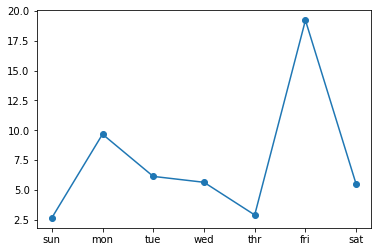

In [20]:
# univariate multi-step encoder-decoder convlstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D

# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[5:-13], data[-13:-6]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2
	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)

# train the model
def build_model(train, n_steps, n_length, n_input):
	# prepare data
	train_x, train_y = to_supervised(train, n_input)
	# define parameters
	verbose, epochs, batch_size = 2, 50, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape into subsequences [samples, time steps, rows, cols, channels]
	train_x = train_x.reshape((train_x.shape[0], n_steps, 1, n_length, n_features))
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
	model.add(Flatten())
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(200, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model

# make a forecast
def forecast(model, history, n_steps, n_length, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [samples, time steps, rows, cols, channels]
	input_x = input_x.reshape((1, n_steps, 1, n_length, 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat

# evaluate a single model
def evaluate_model(train, test, n_steps, n_length, n_input):
	# fit model
	model = build_model(train, n_steps, n_length, n_input)
	# history is a list of weekly data
	history = [x for x in train]
	# walk-forward validation over each week
	predictions = list()
	for i in range(len(test)):
		# predict the week
		yhat_sequence = forecast(model, history, n_steps, n_length, n_input)
		# store the predictions
		predictions.append(yhat_sequence)
		# get real observation and add to history for predicting the next week
		history.append(test[i, :])
	# evaluate predictions days for each week
	predictions = array(predictions)
	score, scores = evaluate_forecasts(test[:, :, 0], predictions)
	return score, scores

# load the new file
dataset = read_csv('1139_daily.csv', header=0, index_col=['Datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# define the number of subsequences and the length of subsequences
n_steps, n_length = 2, 7
# define the total days to use as input
n_input = n_length * n_steps
score, scores = evaluate_model(train, test, n_steps, n_length, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()